**Importing the necessary libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
df=pd.read_excel('/content/drive/MyDrive/Assignment-1_Data.xlsx')

**Geting info about data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


Data Cleaning:


1.   Drop any rows where item name column is null.
2.   Drop any rows where item quantity sold is 0 or less.
3.   Fill missing customer IDs with a placeholder ID (99999)
Create a new column, Sumprice, that tells us total sales 5.revenue (Quantity * Price) of the item


In [ ]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
#Dropping rows where ItemName isn't available
df.dropna(subset=["Itemname"],inplace=True)
#Dropping rows where Quantity <=0
df = df[df["Quantity"]>0]
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132113
Country            0
dtype: int64

In [ ]:
#Fill missing customer IDs
df['CustomerID'].fillna(99999, inplace=True)
#Create SumPrice column
df["SumPrice"]=df["Quantity"]*df["Price"]

**Performing Exploratory data analysis**


*   Finding best selling items in each country
*   Find the total sales by country.
*   Visualizing Total sales by country.



In [ ]:
#Find the best selling items in each country
best_selling_items = df.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
47,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
25,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4024
20,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
42,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
41,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
43,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639
26,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


In [ ]:
#Find the total sales by country.
total_sales_country = df.groupby(['Country']).agg({'SumPrice': 'sum'}).reset_index()
total_sales_country = total_sales_country.sort_values('SumPrice', ascending=False).reset_index(drop=True)
total_sales_country

,Country,SumPrice
0,United Kingdom,9003097.964
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209715.110
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,57089.900
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


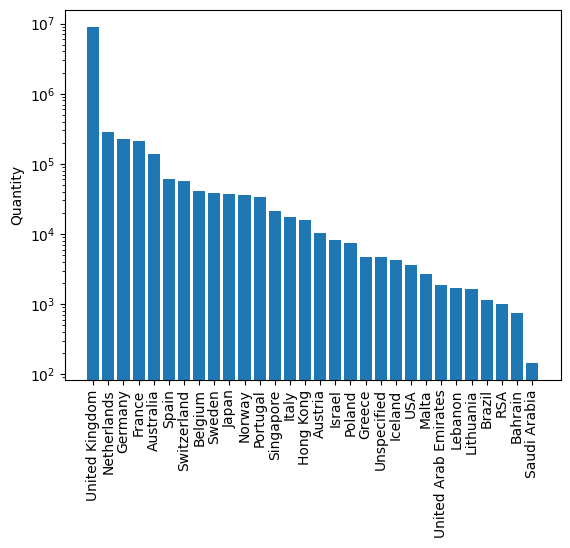

In [ ]:
#Visualizing Total sales by country.
plt.bar(total_sales_country["Country"],total_sales_country["SumPrice"])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Isolate the UK data and let's sort the most popular items in UK by quantity sold.
only_uk = df[df["Country"]=="United Kingdom"]
only_uk.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77036
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49526
JUMBO BAG RED RETROSPOT               44268
WHITE HANGING HEART T-LIGHT HOLDER    35744
                                      ...  
HEN HOUSE W CHICK IN NEST                 1
BLACKCHRISTMAS TREE 30CM                  1
GOLD COSMETICS BAG WITH BUTTERFLY         1
WATERING CAN SINGLE HOOK PISTACHIO        1
*Boombox Ipod Classic                     1
Name: Quantity, Length: 4046, dtype: int64

In [ ]:
#Let's find out what items, across the globe, bring in the most revenue.
total_sales_item = df.groupby(['Itemname']).agg({'Price': 'mean', 'Quantity': 'sum', 'SumPrice': 'sum'}).reset_index()

# Create a new column with the count of rows for each group
total_sales_item['Count'] = df.groupby(['Itemname']).size().values

# Sort the dataframe by 'SumPrice' column in descending order
total_sales_item = total_sales_item.sort_values("SumPrice", ascending=False)

total_sales_item

,Itemname,Price,Quantity,SumPrice,Count
1060,DOTCOM POSTAGE,291.311822,708,206248.77,708
2386,"PAPER CRAFT , LITTLE BIRDIE",2.080000,80995,168469.60,1
2848,REGENCY CAKESTAND 3 TIER,14.043347,13119,165689.19,1930
3840,WHITE HANGING HEART T-LIGHT HOLDER,3.220569,36527,102588.37,2269
2411,PARTY BUNTING,5.808664,17812,97367.48,1677
...,...,...,...,...,...
4025,allocate stock for dotcom orders ta,0.000000,4,0.00,1
4026,amazon,0.000000,161,0.00,8
4027,amazon adjust,0.000000,10,0.00,1
4028,amazon sales,0.000000,20,0.00,1
